# Sean Pharris
# March 4, 2022
# K-Means Clustering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clean-churn-data/churn_clean.csv
/kaggle/input/clean-churn-data/D207 D208 D209 Churn Data Consideration and Dictionary.pdf


A. 

1. What are the trending patterns in the data of those customers that have discontinued their services?

2. In this analysis we will use a clustering technique to identify patterns of customers that have churned in the last 30 days to find a trend amongst those customers.
 


B.  

1.  First we will conduct a Principal Component Analysis to find the most important features. Then we will use the K Means Clustering technique to identify patterns in the customer base by grouping customers together by features of the data set the those customers have in common. 

2.  Assumption:
    * Once K is determined, the algorithim will find K centroids which will assign all points closest to the centroid making a cluster.
    * We can assume that the first model will not be the best model possible and will need optimization.

3. 
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn
* Scipy
 

C.  

1.  The most important data preprocessing goal will be the conducting of a PCA once the data has been cleaned. To make sure we are grouping the clusters by the features that matter most, PCA will help us decide which features those are.

2.  

Continuous:

'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening'

Categorical:

'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'

3.  
    1. Read the data into the data frame ("df") using Pandas "read_csv()"
    2. Changing the names of columns to make the data more understandable
    3. Make sure there are no null values
    4. Create dummy variables for categorical columns
    5. Remove the outliers of numerical data types

4.  To see cleaned data set, see attachment "K-means_cluster_churn.csv".

# Data preparation

### Step 1: Read data in to data frame

In [2]:
# Read in data set into the data frame 
df = pd.read_csv('../input/clean-churn-data/churn_clean.csv')
original_df = df

### Step 2: Change column name

In [3]:
# Renaming the survey columns
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'TimelyFixes', 
                     'Item3':'TimelyReplacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'RespectfulResponse', 
                     'Item7':'CourteousExchange', 
                     'Item8':'EvidenceOfActiveListening'}, 
          inplace=True)

### Step 3: Check for null values

In [4]:
df.isnull().sum()

CaseOrder                    0
Customer_id                  0
Interaction                  0
UID                          0
City                         0
State                        0
County                       0
Zip                          0
Lat                          0
Lng                          0
Population                   0
Area                         0
TimeZone                     0
Job                          0
Children                     0
Age                          0
Income                       0
Marital                      0
Gender                       0
Churn                        0
Outage_sec_perweek           0
Email                        0
Contacts                     0
Yearly_equip_failure         0
Techie                       0
Contract                     0
Port_modem                   0
Tablet                       0
InternetService              0
Phone                        0
Multiple                     0
OnlineSecurity               0
OnlineBa

### Step 4: Create dummy variables for categorical data types

In [5]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 27 categorical variables

The categorical variables are : ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [6]:
# view the categorical variables

print(categorical)

['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [7]:
# check for cardinality in categorical variables

for var in df:
    print(var, ' contains ', len(df[var].unique()), ' labels')

CaseOrder  contains  10000  labels
Customer_id  contains  10000  labels
Interaction  contains  10000  labels
UID  contains  10000  labels
City  contains  6058  labels
State  contains  52  labels
County  contains  1620  labels
Zip  contains  8583  labels
Lat  contains  8563  labels
Lng  contains  8630  labels
Population  contains  5933  labels
Area  contains  3  labels
TimeZone  contains  25  labels
Job  contains  639  labels
Children  contains  11  labels
Age  contains  72  labels
Income  contains  9993  labels
Marital  contains  5  labels
Gender  contains  3  labels
Churn  contains  2  labels
Outage_sec_perweek  contains  9986  labels
Email  contains  23  labels
Contacts  contains  8  labels
Yearly_equip_failure  contains  6  labels
Techie  contains  2  labels
Contract  contains  3  labels
Port_modem  contains  2  labels
Tablet  contains  2  labels
InternetService  contains  3  labels
Phone  contains  2  labels
Multiple  contains  2  labels
OnlineSecurity  contains  2  labels
OnlineBa

In [8]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 23 numerical variables

The numerical variables are : ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening']


### Step 5: Remove outliers

In [9]:
# view summary statistics in numerical variables

print(round(df.describe()),2)

       CaseOrder      Zip      Lat      Lng  Population  Children      Age  \
count    10000.0  10000.0  10000.0  10000.0     10000.0   10000.0  10000.0   
mean      5000.0  49153.0     39.0    -91.0      9757.0       2.0     53.0   
std       2887.0  27532.0      5.0     15.0     14433.0       2.0     21.0   
min          1.0    601.0     18.0   -172.0         0.0       0.0     18.0   
25%       2501.0  26292.0     35.0    -97.0       738.0       0.0     35.0   
50%       5000.0  48870.0     39.0    -88.0      2910.0       1.0     53.0   
75%       7500.0  71866.0     42.0    -80.0     13168.0       3.0     71.0   
max      10000.0  99929.0     71.0    -66.0    111850.0      10.0     89.0   

         Income  Outage_sec_perweek    Email  ...  MonthlyCharge  \
count   10000.0             10000.0  10000.0  ...        10000.0   
mean    39807.0                10.0     12.0  ...          173.0   
std     28200.0                 3.0      3.0  ...           43.0   
min       349.0          

Text(0, 0.5, 'Bandwidth_GB_Year')

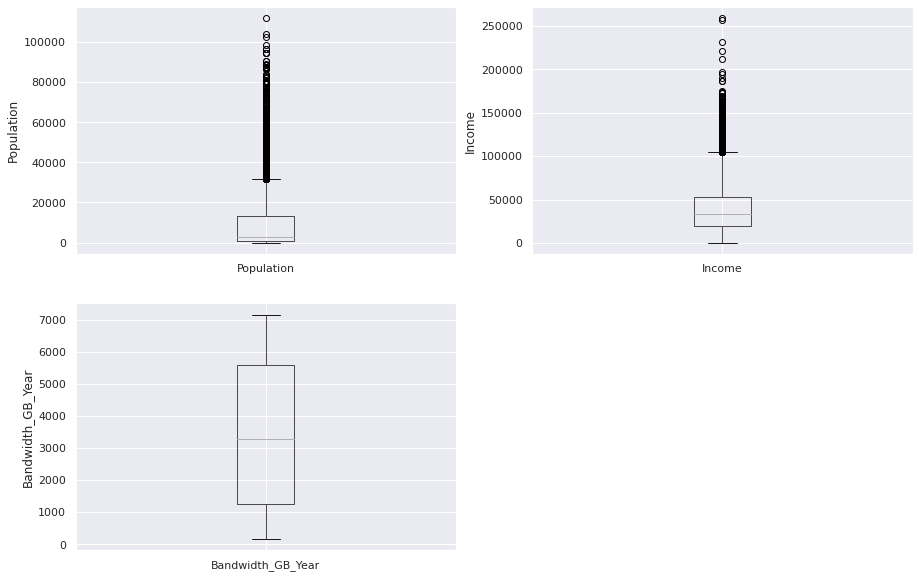

In [10]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Population')
fig.set_title('')
fig.set_ylabel('Population')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Income')
fig.set_title('')
fig.set_ylabel('Income')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Bandwidth_GB_Year')
fig.set_title('')
fig.set_ylabel('Bandwidth_GB_Year')

Text(0, 0.5, 'Churn')

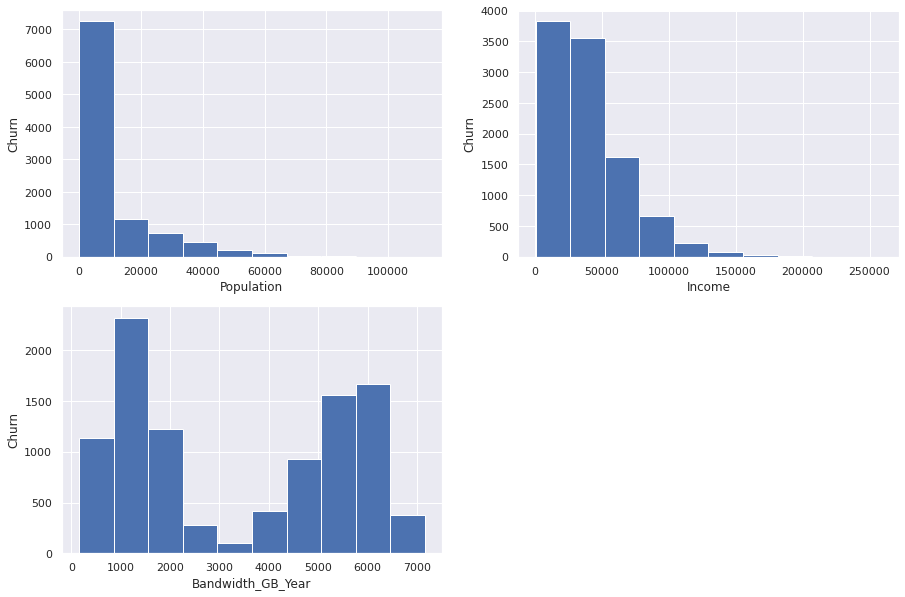

In [11]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 3)
fig = df.Bandwidth_GB_Year.hist(bins=10)
fig.set_xlabel('Bandwidth_GB_Year')
fig.set_ylabel('Churn')

In [12]:
# find outliers for Population

IQR = df.Population.quantile(0.75) - df.Population.quantile(0.25)
lower = df.Population.quantile(0.25) - (IQR * 3)
upper = df.Population.quantile(0.75) + (IQR * 3)
print('Population outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Population outliers are values < -36552.0 or > 50458.0


In [13]:
# find outliers for Income

IQR = df.Income.quantile(0.75) - df.Income.quantile(0.25)
lower = df.Income.quantile(0.25) - (IQR * 3)
upper = df.Income.quantile(0.75) + (IQR * 3)
print('Income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Income outliers are values < -82839.64 or > 155310.5275


In [14]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [df]:
    df3['Population'] = max_value(df3, 'Population', 50458.0)
    df3['Income'] = max_value(df3, 'Income', 155310.5275)

In [15]:
print(df.Population.max(), df.Income.max())

50458.0 155310.5275


Text(0, 0.5, 'Churn')

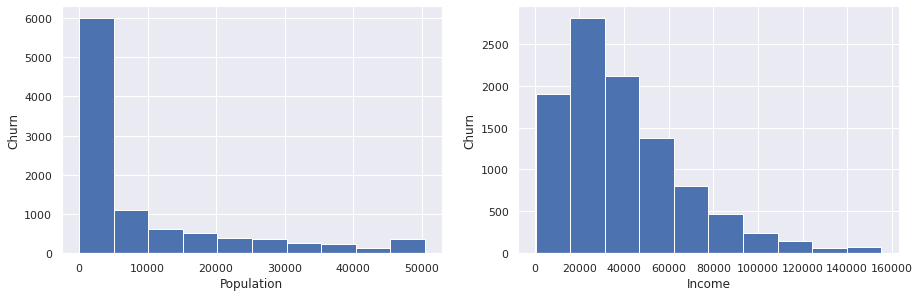

In [16]:
# plot histogram to check distribution of removed outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')

In [17]:
# Desired data set
df.to_csv('K-means_cluster_churn.csv', index=False)

In [18]:
df.drop(columns=['UID', 'Customer_id','Interaction', 'Job','State','City','County','Zip','Lat','Lng', 'TimeZone', 'Marital', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], inplace=True)

In [19]:
model_df = df

D.  

1.  The technique I used to analyze the the data consisted of a PCA and then K-Means clusters. The detailed steps include:
    * Created a new data frame of the data to be analyzed
    * Encoding that data
    * Normalizing that data
    * Fit the data into the K Means model
    * Examine that model using the Elbow method
    * Identify how many clusters to use from that method
    * Reduce the K-Means clusters model to that amount of clusters
    * Examine the data and extract information
    
    See intermediate calculations performed below.  
    
    

2.  See code below used to perform clustering technique.

In [20]:
scaler = StandardScaler()
cluster_df = df

le = preprocessing.LabelEncoder()

# transforming categorical datatypes into numerical types
'''for feature in categorical:
    cluster_df[feature] = le.fit_transform(cluster_df[feature])'''

cluster_df['Churn'] = le.fit_transform(cluster_df['Churn'])

cluster_df = scaler.fit_transform(cluster_df)
    
cluster_df  

array([[-1.73187761, -0.71437651, -0.97233791, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [-1.7315312 ,  0.07827537, -0.50659192, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-1.73118479, -0.43282059,  0.89064606, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [ 1.73118479, -0.68635038, -0.50659192, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 1.7315312 ,  1.99204833, -0.50659192, ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 1.73187761,  0.21414114, -0.50659192, ..., -0.48116458,
         0.47693123, -2.42625317]])

### Now we will fit data into the K-Means model

In [21]:
wcss = []
for i in range(1,11):
    kmeans_data = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    kmeans_data.fit(cluster_df)
    wcss.append(kmeans_data.inertia_)

### Below we will use the elbow method to determine the amount of clusters to use

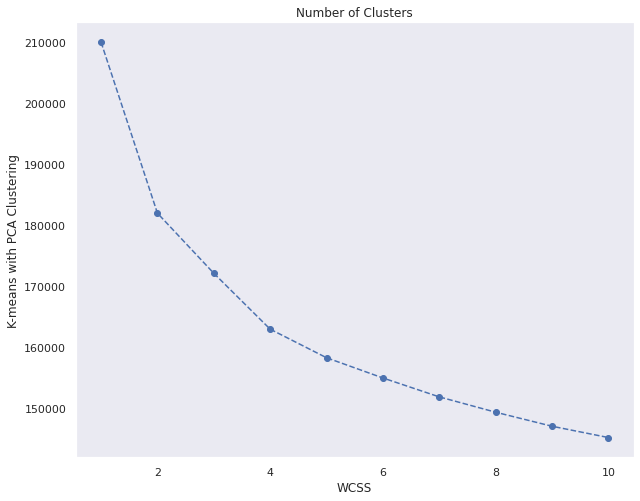

In [22]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-means with PCA Clustering')
plt.grid()
plt.show()

### We can see that the kink in the elbow is roughly at the 2.

In [23]:
kmeans_data = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2)

kmeans_data.fit(cluster_df)

KMeans(n_clusters=2, random_state=2)

In [24]:
df_segm_pca_kmeans = pd.DataFrame(cluster_df)

In [25]:
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_data.labels_

In [26]:
model_df['Segment K-Means PCA'] = kmeans_data.labels_
model_df.head()

,CaseOrder,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,EvidenceOfActiveListening,Segment K-Means PCA
0,1,38.0,0,68,28561.99,0,7.978323,10,0,1,...,904.536110,5,5,5,3,4,4,3,4,1
1,2,10446.0,1,27,21704.77,1,11.699080,12,0,1,...,800.982766,3,4,3,3,4,3,4,4,1
2,3,3735.0,4,50,9609.57,0,10.752800,9,0,1,...,2054.706961,4,4,2,4,4,3,3,3,1
3,4,13863.0,1,48,18925.23,0,14.913540,15,2,0,...,2164.579412,4,4,4,2,5,4,3,3,1
4,5,11352.0,0,83,40074.19,1,8.147417,16,2,1,...,271.493436,4,4,4,3,4,4,4,5,1


### E1. Accuracy


Confusion matrix:
* Below, 0 will represent 'No' and 1 will represent 'Yes'

In [27]:
pd.pivot_table(model_df, index=['Churn', 'Segment K-Means PCA'], values='CaseOrder', aggfunc='count')

CaseOrder
Churn Segment K-Means PCA           
0     0                         4717
      1                         2633
1     0                          277
      1                         2373

In [28]:
score = metrics.accuracy_score(model_df['Segment K-Means PCA'], model_df['Churn'])
print('Accuracy Score: ', score)

Accuracy Score:  0.709


In [29]:
model_df['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'Cluster 1',1:'Cluster 2'})

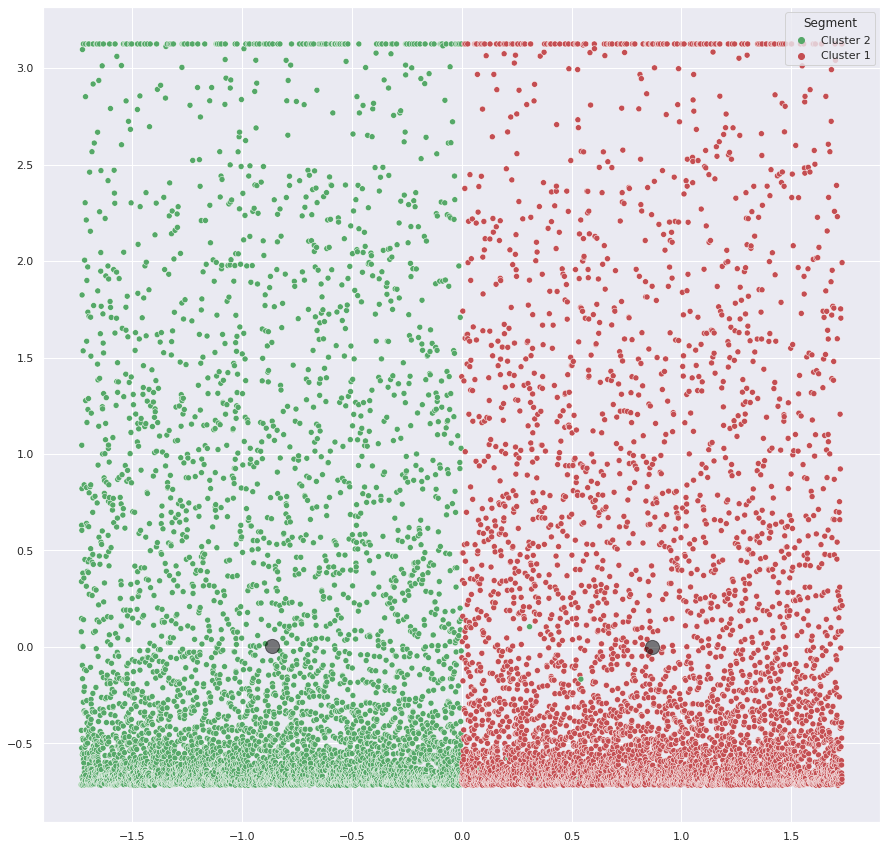

In [30]:
plt.figure(figsize = (15, 15))
sns.scatterplot(cluster_df[:, 0], cluster_df[:, 1], hue= model_df['Segment'], palette = ['g', 'r'])
centers = kmeans_data.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### E2.  Results:
* This analysis yielded two clusters
* These clusters were correct 70.9% of the time
* This implies that there are trends in client attrition worth investigating. 
* This model also appeared to cluster non-churning customers more precisely than those that had.

### E3.  Limitation:
* The main limitation I ran into with K-Means is the lack of use of catgorical data types.

### E4.  Recommendation:
* According on the findings of this study, it may be worthwhile to investigate the variables employed to determine their association with customer churn. The algorithim identified two reasonably accurate clusters of customers that discontinued their services and those that did not, these characteristics are likely to play a significant impact in customer churn. It can be important to examine the links between persons that did churn in order to determine what common factors grouped them together and, potentially, take action based on these characteristics.
 

### F.  Panopto video:
 https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b9e1bb76-2bac-47e2-8904-ae5f00b3dc3a

### G.  Third-party code:  
 Kaloyanova, E. (2020). How to Combine PCA and K-means Clustering in Python? 365 Data Science. https://365datascience.com/tutorials/python-tutorials/pca-k-means/  